<a href="https://colab.research.google.com/github/ycikikci/My-Exercises/blob/main/Weeks_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving m-dec12910.txt to m-dec12910 (1).txt
Saving m-ibm3dx2608.xlsx to m-ibm3dx2608.xlsx
Saving m-ibmsp6709.xlsx to m-ibmsp6709.xlsx
Saving q-gnp4710.xlsx to q-gnp4710 (1).xlsx


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
df1=pd.read_csv("/content/m-dec12910.txt", skiprows=1, sep = " ", header=None)
df1.columns=["date", "dec1", "dec2", "dec9", "dec10"]


In [ ]:
df1.head()

,date,dec1,dec2,dec9,dec10
0,19670131,0.068568,0.080373,0.180843,0.211806
1,19670228,0.008735,0.011044,0.048767,0.064911
2,19670331,0.039698,0.035364,0.067494,0.068904
3,19670428,0.044030,0.037541,0.040785,0.044602
4,19670531,-0.050631,-0.036233,-0.002191,0.000295


In [ ]:
print(df1.shape)

(516, 5)


In [ ]:
d10=df1["dec10"]
dec10=pd.Series(d10.values, index=pd.date_range(start='1967-01', periods=516, freq='M'))

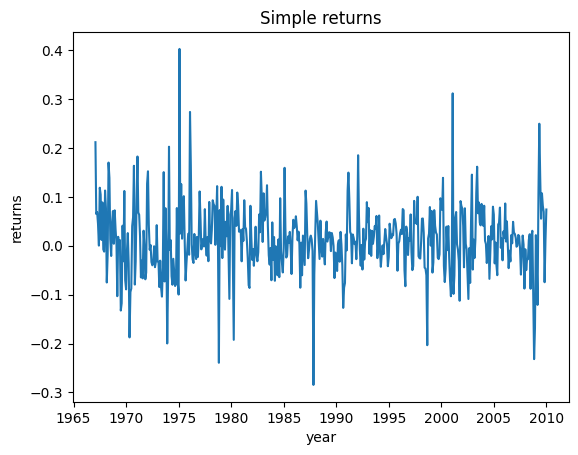

In [ ]:
# Plot time series
plt.plot(dec10)
plt.xlabel('year')
plt.ylabel('returns')
plt.title('Simple returns')
plt.show()

[ 1.          0.22738659 -0.01902645 -0.02125825  0.01101134  0.00267606
 -0.02765489 -0.01691061 -0.04918369 -0.03961776  0.01326555  0.06101322
  0.13041104 -0.0368812  -0.08246274 -0.02095014  0.01672639 -0.01396121
 -0.05942281 -0.08224607 -0.0636416  -0.03985838  0.01777099 -0.01541353
  0.05221208]


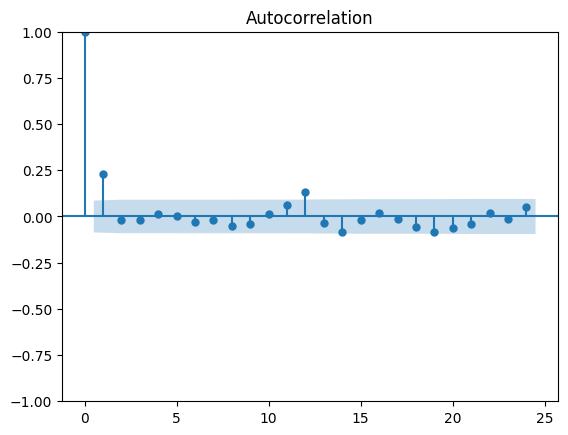

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
acf_dec10=acf(dec10)
print(acf_dec10[0:25])
plot_acf(dec10, alpha=0.05, lags=24)
plt.show()

In [ ]:
f12 = acf_dec10[12]
print(f12)

0.13041104491938882


In [ ]:
from math import sqrt
nobs=len(dec10)
z=f12*sqrt(nobs)
print(z)

2.962369485509006


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(dec10, lags=[10], model_df=0)
print(lb_test)

      lb_stat  lb_pvalue
10  30.069982   0.000834


In [ ]:
jan=np.concatenate(([1], np.zeros(11)), axis=None)
jan=np.tile(jan,43)
print(jan)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.

In [ ]:
import statsmodels.api as sm
jan=sm.add_constant(jan)
m1 = sm.OLS(dec10, jan).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     49.15
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           7.48e-12
Time:                        17:53:22   Log-Likelihood:                 665.12
No. Observations:                 516   AIC:                            -1326.
Df Residuals:                     514   BIC:                            -1318.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.003      1.958      0.0

In [ ]:
df2=pd.read_excel("/content/m-ibmsp6709.xlsx")
df2.head()

,date,ibm,sp
0,19670131,0.075370,0.078178
1,19670228,0.079099,0.001963
2,19670331,0.048837,0.039410
3,19670428,0.100887,0.042239
4,19670531,-0.035234,-0.052441


In [ ]:
ibm = df2['ibm']
lnibm = np.log(ibm + 1)

In [ ]:
lb_test = acorr_ljungbox(ibm, lags=[10], model_df=0)
print(lb_test)

     lb_stat  lb_pvalue
10  6.471321   0.774234


In [ ]:
lb_test = acorr_ljungbox(lnibm, lags=[10], model_df=0)
print(lb_test)

     lb_stat  lb_pvalue
10  6.423164   0.778547


In [ ]:
df3=pd.read_excel("/content/q-gnp4710.xlsx")
df3.head()

,Year,Month,Day,VALUE
0,1947,1,1,238.1
1,1947,4,1,241.5
2,1947,7,1,245.6
3,1947,10,1,255.6
4,1948,1,1,261.7


In [ ]:
gnp=df3.iloc[:,3]
gnp[gnp.isna()]

Series([], Name: VALUE, dtype: float64)

In [ ]:

len(gnp)


253

In [ ]:
gnp=pd.Series(gnp.values, index=pd.date_range(start='1947/01/01', periods=253, freq='3M'))
gnp.head()

1947-01-31    238.1
1947-04-30    241.5
1947-07-31    245.6
1947-10-31    255.6
1948-01-31    261.7
Freq: 3M, dtype: float64

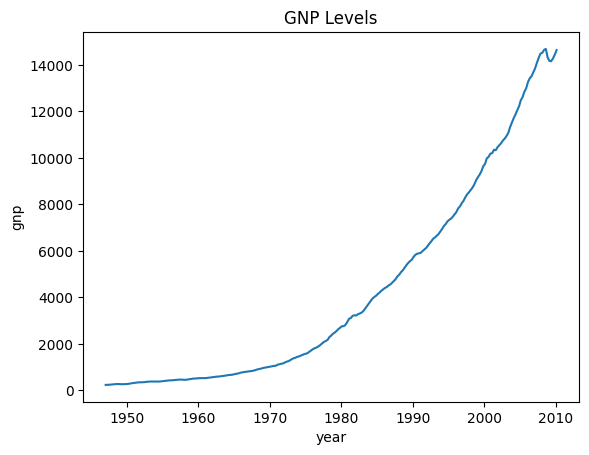

In [ ]:
plt.plot(gnp)
plt.xlabel('year')
plt.ylabel('gnp')
plt.title("GNP Levels")
plt.show()

In [ ]:
ggnp = np.log(gnp).diff().dropna()
ggnp.head()

1947-04-30    0.014179
1947-07-31    0.016835
1947-10-31    0.039910
1948-01-31    0.023585
1948-04-30    0.026397
Freq: 3M, dtype: float64

In [ ]:
len(ggnp)

252

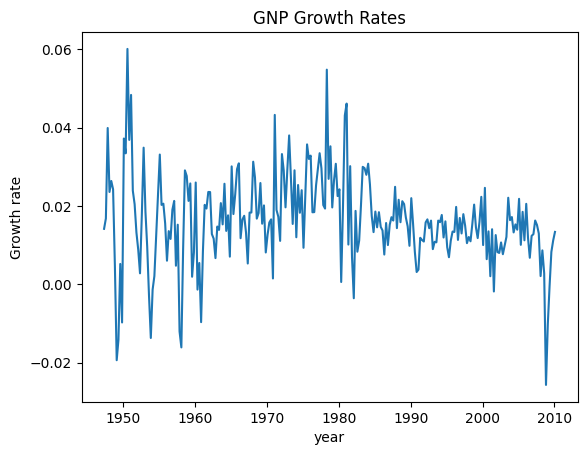

In [ ]:
plt.plot(ggnp)
plt.xlabel('year')
plt.ylabel('Growth rate')
plt.title("GNP Growth Rates")
plt.show()

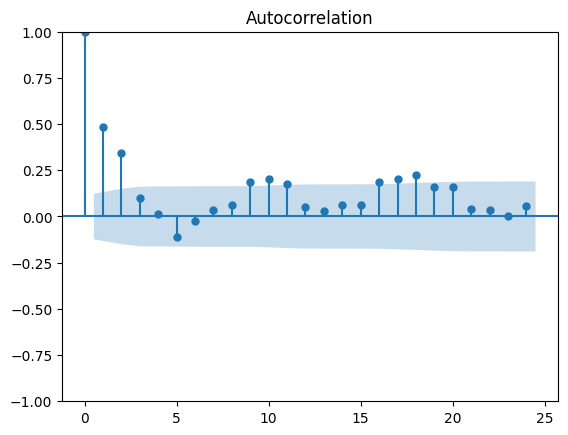

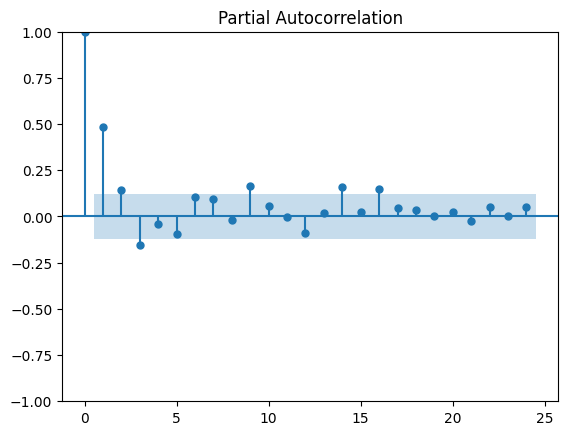

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(ggnp, alpha=0.05, lags=24)
plot_pacf(ggnp, alpha=0.05, lags=24)
plt.show()

In [ ]:
from statsmodels.tsa.ar_model import ar_select_order
mod  = ar_select_order(ggnp, maxlag=12, ic='aic', glob=True)
mod.ar_lags

[1, 2, 3, 9, 10, 12]

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import AutoRegResults
ar9 = AutoReg(ggnp, lags=9).fit()
print(ar9.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  252
Model:                     AutoReg(9)   Log Likelihood                 793.246
Method:               Conditional MLE   S.D. of innovations              0.009
Date:                Tue, 19 Dec 2023   AIC                          -1564.491
Time:                        17:54:53   BIC                          -1526.068
Sample:                    07-31-1949   HQIC                         -1549.015
                         - 01-31-2010                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0059      0.002      3.221      0.001       0.002       0.010
y.L1           0.4024      0.063      6.405      0.000       0.279       0.526
y.L2           0.2095      0.067      3.124      0.0

In [ ]:
ar3 = AutoReg(ggnp, lags=3).fit() # standard formulation, conditional MLE
print(ar3.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  252
Model:                     AutoReg(3)   Log Likelihood                 800.535
Method:               Conditional MLE   S.D. of innovations              0.010
Date:                Tue, 19 Dec 2023   AIC                          -1591.069
Time:                        17:54:57   BIC                          -1573.482
Sample:                    01-31-1948   HQIC                         -1583.990
                         - 01-31-2010                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0082      0.001      6.450      0.000       0.006       0.011
y.L1           0.4380      0.062      7.079      0.000       0.317       0.559
y.L2           0.2089      0.066      3.143      0.0

In [ ]:
ggnp.mean()

0.016343881294275952

In [ ]:
0.0082/(1-0.438-0.2089+0.1542)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
ar3arima = ARIMA(ggnp, order=(3, 0, 0)).fit()  # demeaned formulation, full MLE
print(ar3arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 808.558
Date:                Tue, 19 Dec 2023   AIC                          -1607.117
Time:                        17:55:04   BIC                          -1589.470
Sample:                    04-30-1947   HQIC                         -1600.016
                         - 01-31-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0163      0.001     13.251      0.000       0.014       0.019
ar.L1          0.4386      0.053      8.276      0.000       0.335       0.542
ar.L2          0.2062      0.055      3.759      0.0

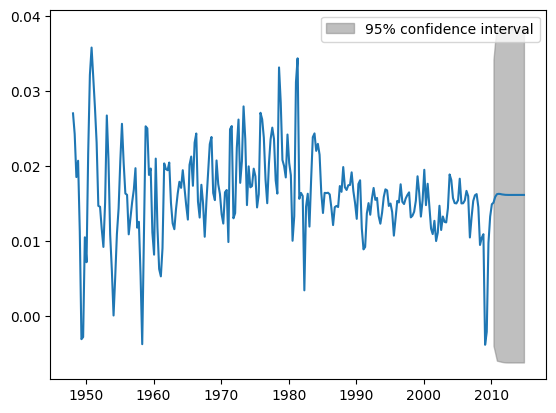

In [ ]:
fig=ar3.plot_predict(0,270)

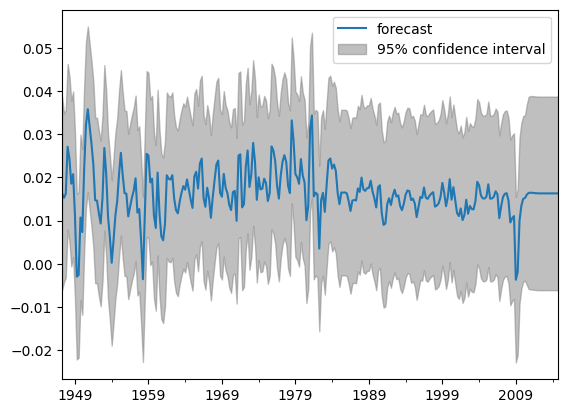

In [ ]:
plot_predict(ar3arima, 0, 270)
plt.show()

In [ ]:
lb_test = acorr_ljungbox(ar3.resid, lags=[10], model_df=3)
print(lb_test)

      lb_stat  lb_pvalue
10  11.430848   0.120899


In [ ]:
lb_test = acorr_ljungbox(ar3arima.resid, lags=[10], model_df=3)
print(lb_test)

      lb_stat  lb_pvalue
10  16.029148   0.024851


<Axes: >

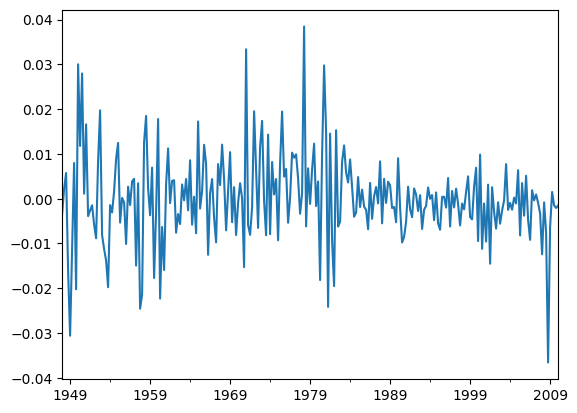

In [ ]:
ar3.resid.plot()

<Axes: >

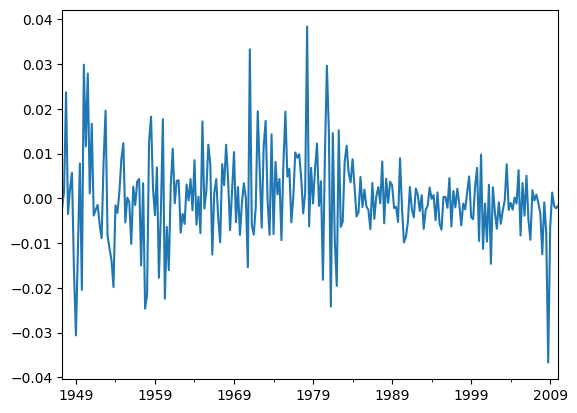

In [ ]:
ar3arima.resid.plot()

In [ ]:
ar9arimaref = ARIMA(ggnp, order=((1,1,0,0,1,0,0,0,1), 0, 0)).fit()
print(ar9arimaref.summary())

                                   SARIMAX Results                                   
Dep. Variable:                             y   No. Observations:                  252
Model:             ARIMA([1, 2, 5, 9], 0, 0)   Log Likelihood                 813.651
Date:                       Tue, 19 Dec 2023   AIC                          -1615.301
Time:                               17:55:33   BIC                          -1594.125
Sample:                           04-30-1947   HQIC                         -1606.780
                                - 01-31-2010                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0160      0.002     10.072      0.000       0.013       0.019
ar.L1          0.3885      0.054      7.256      0.000       0.284       0.

In [ ]:
lb_test = acorr_ljungbox(ar9arimaref.resid, lags=[10], model_df=4)
print(lb_test)

     lb_stat  lb_pvalue
10  6.386373   0.381328


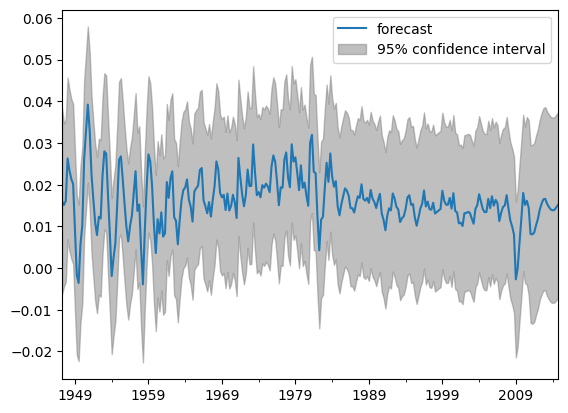

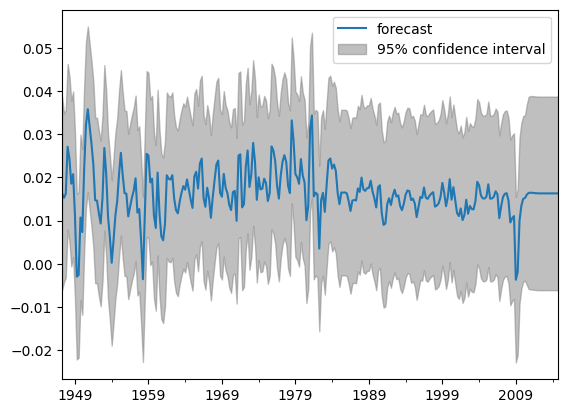

In [ ]:
plot_predict(ar9arimaref, 0, 270)
plt.show()
plot_predict(ar3arima, 0, 270)
plt.show()

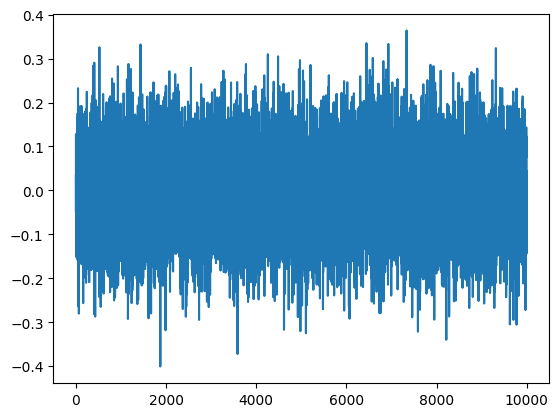

In [ ]:
np.random.seed(9643)
x = np.random.normal(loc=0, scale=0.1, size=10000)
plt.plot(x)

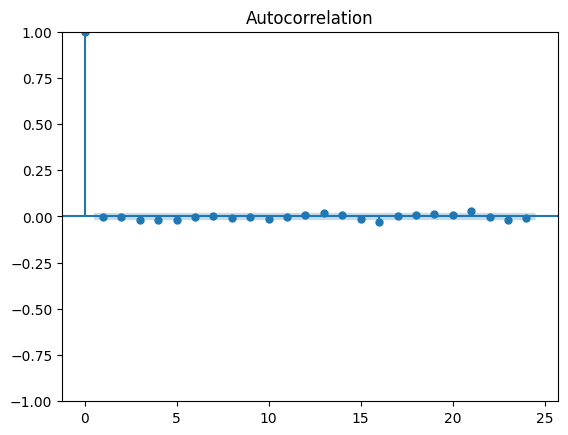

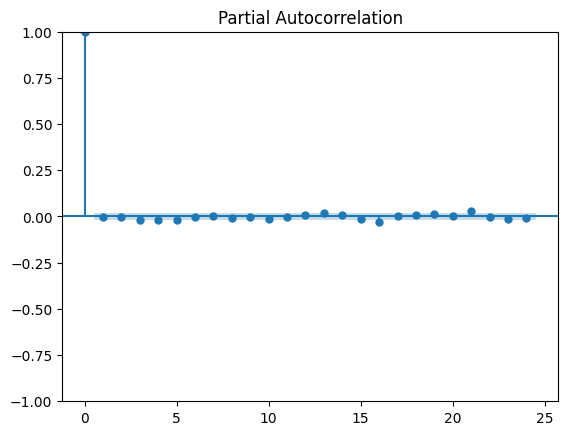

In [ ]:
plot_acf(x, alpha=0.05, lags=24)
plot_pacf(x, alpha=0.05, lags=24)
plt.show()

In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.6 MB/s eta 0:00:00


In [ ]:
auto_arima(x)

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

## White Noise
- What is White Noise?
    - White Noise is a series with:
        - Constant mean
        - Constant variance
        - Zero autocorrelation at all lags
    - Special Case: if data has normal distribution, then Guassian White Noise

### Can't Forecast White Noise
A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. Stock returns are often modeled as white noise. For white noise, we cannot forecast future observations based on the past - autocorrelations at all lags are zero.

The residuals from a good model should have white noise characteristics (i.i.d.)

In [ ]:
from statsmodels.tsa.stattools import kpss
kpss(x, regression='c', nlags=12, store=False)

<ipython-input-66-912f5ac6f1f7>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(x, regression='c', nlags=12, store=False)


(0.15114044100327573,
 0.1,
 12,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

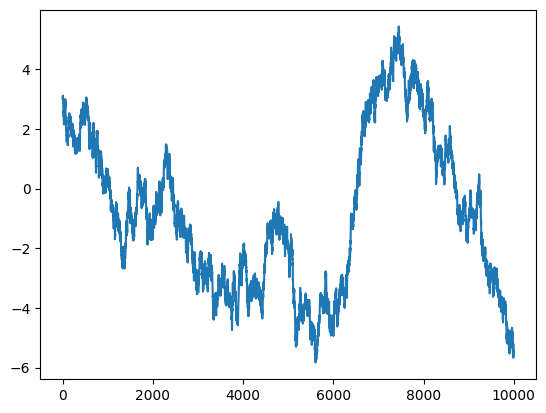

In [ ]:
y = 3 + np.cumsum(x)
plt.plot(y)

## Random Walk
- What is a Random Walk?
    - Today's Price = Yesterday's Price + Noise
$$ P_t = P_{t-1} + \epsilon_t$$
        - Change in price is white noise
$$ P_t - P_{t-1} = \epsilon_t $$
        - Cannot forecast a random walk
        - Best forecast for tomorrow's price is today's price
    - Random Walk with drift:
$$ P_t = \mu + P_{t-1} + \epsilon_t $$
        - Change in price is white noise with non-zero mean:
$$ P_t - P_{t-1} = \mu + \epsilon_t $$
- Statistical Test for Random Walk
    - Random walk with drift
$$ P_t = \mu + P_{t-1} + \epsilon_t $$
    - Regression test for random walk
$$ P_t = \alpha + \beta P_{t-1} + \epsilon_t $$
    - It is equivalent to:
$$ P_t - P_{t-1} = \alpha + \beta P_{t-1} + \epsilon_t $$
    - Test:
        - $H_0 : \beta = 0$ (random walk)
        - $H_1 : \beta < 0$ (not random walk)

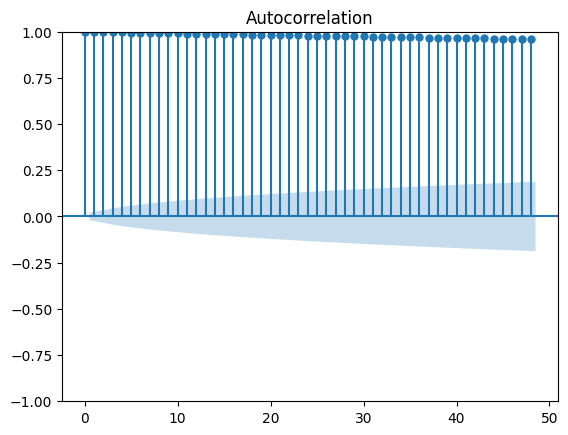

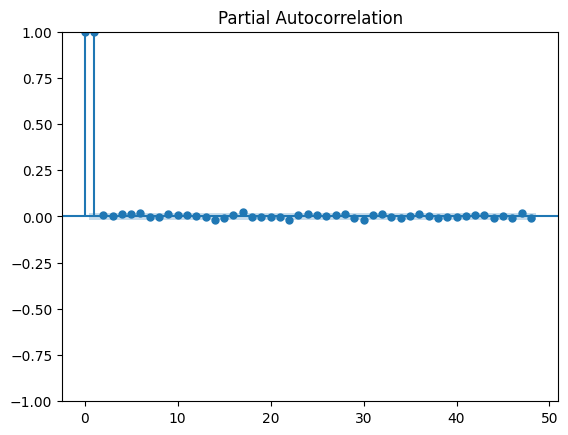

In [ ]:
plot_acf(y, alpha=0.05, lags=48)
plot_pacf(y, alpha=0.05, lags=48)
plt.show()

In [ ]:
auto_arima(y)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
kpss(y, nlags='auto')

<ipython-input-70-713637cd8c5d>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(y, nlags='auto')


(1.677474848664483,
 0.01,
 59,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

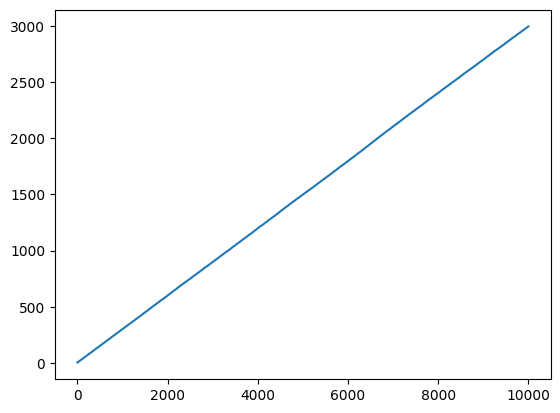

In [ ]:
z = 0.3 * np.arange(1, 10001) + y
plt.plot(z)

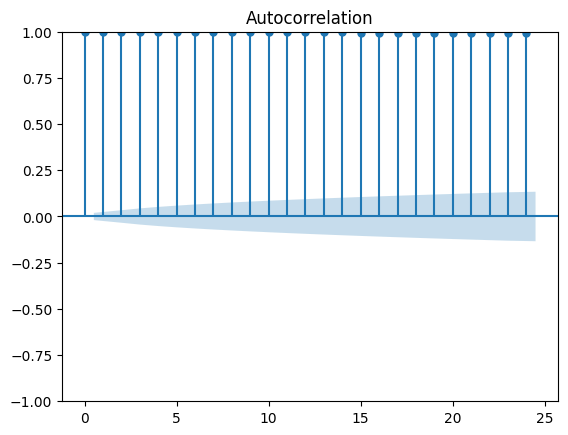

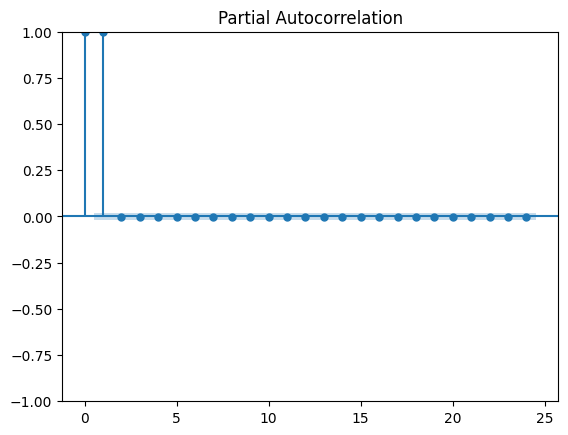

In [ ]:
plot_acf(z, alpha=0.05, lags=24)
plot_pacf(z, alpha=0.05, lags=24)
plt.show()

In [ ]:
auto_arima(z)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
kpss(z, regression='ct', nlags='legacy', store=False)

<ipython-input-74-b9d7f26c5277>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(z, regression='ct', nlags='legacy', store=False)


(2.5011173280781005,
 0.01,
 38,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

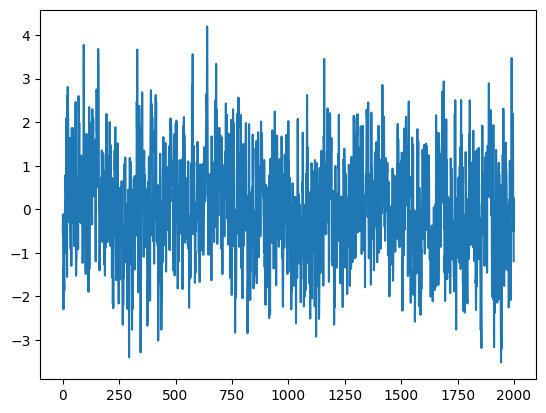

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess
ar2=np.array([1, -0.4, -0.2]) # AR(1)=0.4, AR(2)=0.2 !
ma0=np.array([1])
simar2=ArmaProcess(ar2, ma0).generate_sample(nsample=2000)
plt.plot(simar2)

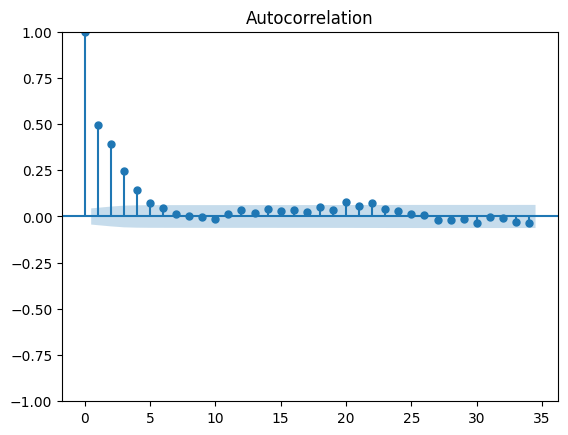

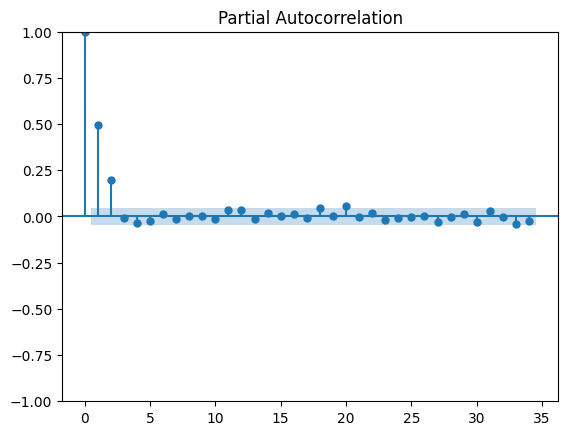

In [ ]:
plot_acf(simar2)
plot_pacf(simar2)
plt.show()

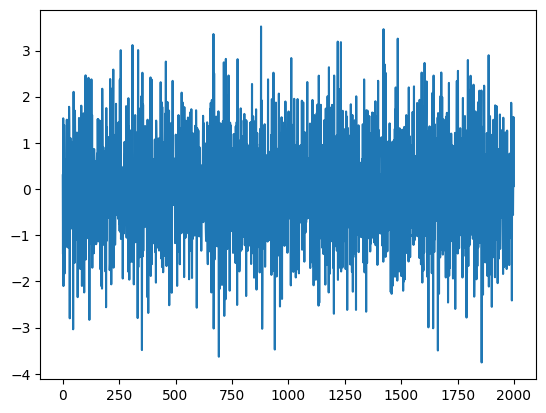

In [ ]:
ar0=np.array([1])
ma2=np.array([1, -0.4, -0.2]) # MA(1)=-0.4, MA(2)=-0.2 !
simma2=ArmaProcess(ar0, ma2).generate_sample(nsample=2000)
plt.plot(simma2)

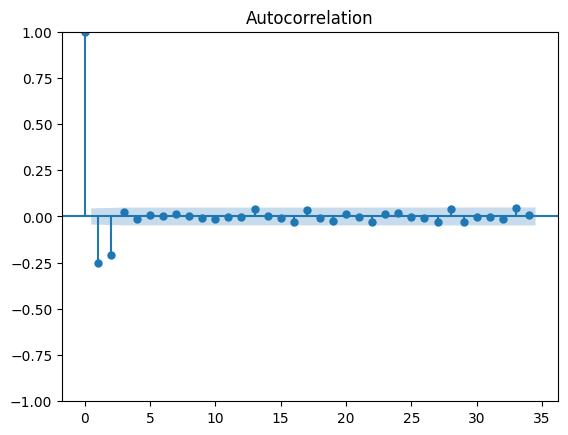

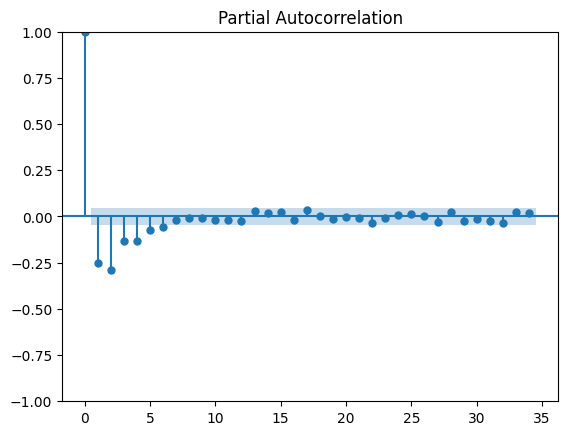

In [ ]:
plot_acf(simma2)
plot_pacf(simma2)
plt.show()

In [ ]:
simma = ARIMA(simma2, order=(0, 0, 2), trend='n').fit()
print(simma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -2871.037
Date:                Tue, 19 Dec 2023   AIC                           5748.074
Time:                        18:00:30   BIC                           5764.877
Sample:                             0   HQIC                          5754.244
                               - 2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3845      0.022    -17.298      0.000      -0.428      -0.341
ma.L2         -0.2327      0.022    -10.661      0.000      -0.275      -0.190
sigma2         1.0335      0.032     31.904      0.0

In [ ]:
auto_arima(simma2)

ARIMA(order=(1, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
auto_arima(gnp)

ARIMA(order=(2, 2, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
auto_arima(ggnp)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
kpss(ggnp, regression='c', nlags='legacy', store=False)

(0.39821322603651765,
 0.07792533360494928,
 16,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [ ]:
kpss(ggnp, regression='c', nlags='auto', store=False)

(0.5247110345090016,
 0.03610111835382847,
 7,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(ggnp, regression='c')

(-1.5846315680629988,
 0.4913088360466313,
 15,
 236,
 {'1%': -3.4583663275730476,
  '5%': -2.8738660999177132,
  '10%': -2.5733390785693766},
 -1538.1126019925596)

In [ ]:
adfuller(ggnp, regression='c', autolag='AIC')

(-1.5846315680629988,
 0.4913088360466313,
 15,
 236,
 {'1%': -3.4583663275730476,
  '5%': -2.8738660999177132,
  '10%': -2.5733390785693766},
 -1538.1126019925596)

In [ ]:
adfuller(ggnp, regression='c', autolag='BIC')

(-9.27104334649562,
 1.3265975964338128e-15,
 0,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 -1527.0561092219148)

In [ ]:
adfuller(ggnp, regression='c', maxlag=10)

(-3.3612912376757094,
 0.012351392233120005,
 8,
 243,
 {'1%': -3.4575505077947746,
  '5%': -2.8735087323013526,
  '10%': -2.573148434859185},
 -1555.6878048011768)

In [ ]:
arima22 = ARIMA(ggnp, order=(2, 1, 2)).fit()
print(arima22.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 802.767
Date:                Tue, 19 Dec 2023   AIC                          -1595.533
Time:                        18:03:23   BIC                          -1577.906
Sample:                    04-30-1947   HQIC                         -1588.440
                         - 01-31-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3627      0.146     -2.481      0.013      -0.649      -0.076
ar.L2          0.4166      0.063      6.572      0.000       0.292       0.541
ma.L1         -0.2067      0.143     -1.443      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
arma22 = ARIMA(ggnp, order=(2, 0, 2)).fit()
print(arma22.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 807.923
Date:                Tue, 19 Dec 2023   AIC                          -1603.846
Time:                        18:03:29   BIC                          -1582.669
Sample:                    04-30-1947   HQIC                         -1595.325
                         - 01-31-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0163      0.001     12.782      0.000       0.014       0.019
ar.L1          0.4316      0.330      1.308      0.191      -0.215       1.078
ar.L2         -0.0544      0.227     -0.240      0.8

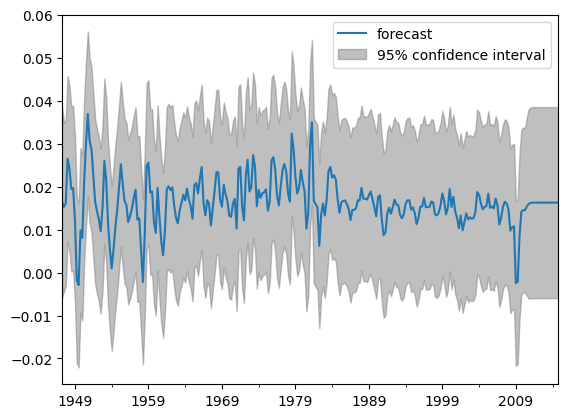

In [ ]:
plot_predict(arma22, 0, 270)
plt.show()

In [ ]:
lb_test = acorr_ljungbox(arma22.resid, lags=[10], model_df=4)
print(lb_test)

     lb_stat  lb_pvalue
10  16.72799   0.010337
